In [7]:
url = 'http://www.bjsubway.com/e/action/ListInfo/?classid=39&ph=1'
url2='https://map.bjsubway.com/'
import requests

kv = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"}

response = requests.get(url,headers = kv,allow_redirects=False)
html = response.text


html



KeyboardInterrupt: 

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'lxml')
soup.find_all('th')

NameError: name 'html' is not defined

In [1]:
from bs4 import BeautifulSoup
database = 'C:/Users/Administrator/mywork/lession3/allstations.txt'
line1_station = open(database).read()
ss = line1_station.replace('\n','').replace(',','')

In [2]:
line = ss.split('<br>')
line

['<th>苹果园</th> <th>古城</th> <th>八角游乐园</th> <th>八宝山</th> <th>玉泉路</th> <th>五棵松</th> <th>万寿路</th> <th>公主坟</th> <th>军事博物馆</th> <th>木樨地</th> <th>南礼士路</th> <th>复兴门</th> <th>西单</th> <th>天安门西</th> <th>天安门东</th> <th>王府井</th> <th>东单</th> <th>建国门</th> <th>永安里</th> <th>国贸</th> <th>大望路</th> <th>四惠</th> <th>四惠东</th>',
 ' <th> 西直门</th> <th> 积水潭</th> <th> 鼓楼大街</th> <th> 安定门</th> <th> 雍和宫</th> <th> 东直门</th> <th> 东四十条</th> <th> 朝阳门</th> <th> 建国门</th> <th> 北京站</th> <th> 崇文门</th> <th> 前门</th> <th> 和平门</th> <th> 宣武门</th> <th> 长椿街</th> <th> 复兴门</th> <th> 阜成门</th> <th> 车公庄</th> ',
 ' <th>天宫院</th> <th>安河桥北</th> <th>生物医院基地</th> <th>北宫门</th> <th>义和庄</th> <th>西苑</th> <th>黄村火车站</th> <th>圆明园</th> <th>黄村西大街</th> <th>北京大学东门</th> <th>清源路</th> <th>中关村</th> <th>枣园</th> <th>海淀黄庄</th> <th>高米店南</th> <th>人民大学</th> <th>高米店北</th> <th>魏公村</th> <th>西红门</th> <th>国家图书馆</th> <th>新宫</th> <th>动物园</th> <th>公益西桥</th> <th>西直门</th> <th>角门西</th> <th>新街口</th> <th>马家堡</th> <th>平安里</th> <th>北京南站</th> <th>西四</th> <th>陶然亭</th> <th>灵境胡同</th> <

In [3]:

line_stations=[]
for i,l in enumerate(line):
    soup = BeautifulSoup(l,'lxml')
    e = soup.get_text()
   
    s = [w for w in e.split(' ') if w.strip()]
    line_stations.append(s)

In [4]:

from collections import defaultdict

In [5]:
stations_connection = defaultdict(list)
for li in line_stations:
    for i, s in enumerate(li):
        if i==0:
            stations_connection[s].append(li[i+1])
        elif i==len(li)-1:
            stations_connection[s].append(li[i-1])
        else:
            stations_connection[s].append(li[i-1])
            stations_connection[s].append(li[i+1])
    

In [6]:
stations_connection['燕山']

['房山城关']

In [7]:
import networkx as nx
%matplotlib inline
stations_connection_graph = nx.Graph(stations_connection)

H:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
H:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
H:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
H:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


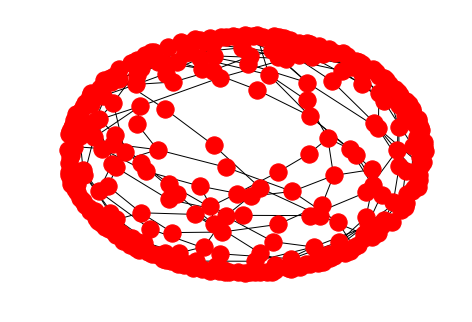

In [8]:
#找不到坐标的HTML，只有站点的分别
nx.draw(stations_connection_graph)

In [9]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [10]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [11]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [12]:

search(stations_connection, start='燕山', is_goal=is_goal('苹果园'), search_strategy=lambda n: n)

['燕山',
 '房山城关',
 '饶乐府',
 '马各庄',
 '大石河东',
 '星城',
 '阎村',
 '紫草坞',
 '阎村东',
 '苏庄',
 '良乡南关',
 '良乡大学城西',
 '良乡大学城',
 '良乡大学城北',
 '广阳城',
 '篱笆房',
 '长阳',
 '稻田',
 '大葆台',
 '郭公庄',
 '丰台科技园',
 '科怡路',
 '丰台南路',
 '丰台东大街',
 '七里庄',
 '六里桥',
 '莲花桥',
 '公主坟',
 '万寿路',
 '五棵松',
 '玉泉路',
 '八宝山',
 '八角游乐园',
 '古城',
 '苹果园']

In [13]:
def get_total_station(path):
    return len(path)

In [14]:

def get_as_much_path(path): 
    return -1 * len(path)

In [15]:
search(stations_connection, start='苹果园', is_goal=is_goal('大望路'), search_strategy=sort_path(get_total_station, beam=10))

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路']

In [16]:
stations = search(stations_connection, start='燕山', is_goal=is_goal('东直门'), search_strategy=sort_path(get_total_station, beam=10))



In [17]:
stations

['燕山',
 '房山城关',
 '饶乐府',
 '马各庄',
 '大石河东',
 '星城',
 '阎村',
 '紫草坞',
 '阎村东',
 '苏庄',
 '良乡南关',
 '良乡大学城西',
 '良乡大学城',
 '良乡大学城北',
 '广阳城',
 '篱笆房',
 '长阳',
 '稻田',
 '大葆台',
 '郭公庄',
 '丰台科技园',
 '科怡路',
 '丰台南路',
 '丰台东大街',
 '七里庄',
 '西局',
 '泥洼',
 '丰台站',
 '首经贸',
 '纪家庙',
 '草桥',
 '角门西',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安定门',
 '雍和宫',
 '东直门']

In [18]:
len(stations)

38

In [19]:
#百度地图搜索结果：燕山 to 东直门 ，结果一致
燕山  
燕房线（8站）
房山城关
饶乐府
马各庄
大石河东
星城
阎村
紫草坞
阎村东约22分钟  
房山线（11站）
苏庄
良乡南关
良乡大学城西
良乡大学城
良乡大学城北
广阳城
篱笆房
长阳
稻田
大葆台
郭公庄约1小时10分钟  
9号线（6站）
丰台科技园
科怡路
丰台南路
丰台东大街
七里庄
六里桥约1小时27分钟  
10号线（2站）
莲花桥
公主坟约1小时34分钟  
1号线（10站）
军事博物馆
木樨地
南礼士路
复兴门
西单
天安门西
天安门东
王府井
东单
建国门约2小时  
2号线（3站）
朝阳门
东四十条
东直门

SyntaxError: invalid character in identifier (<ipython-input-19-f3b8c4f4893a>, line 3)

In [20]:
#这个不知道为什么出不来
search(stations_connection, start='古城', is_goal=is_goal('安河桥北'), search_strategy=sort_path(get_as_much_path, beam=10))

In [21]:
# search with by_way stations

In [22]:
def is_by_way_path(by_way_stations):
    def _inner(path):
        for p in by_way_stations.split():
            if p not in path:
                return False
        return True
    return _inner
    

In [45]:
def search_by_way(graph, start, is_goal,is_by_way_path, search_strategy):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        #if froniter in seen: continue
            
        successors = graph[froniter]
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            if is_goal(new_path): 
                if is_by_way_path(new_path):return new_path
                else:continue
            pathes.append(new_path)
        
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [46]:

search(stations_connection, start='公主坟', is_goal=is_goal('湾子'), search_strategy=sort_path(get_total_station, beam=10))


['公主坟', '军事博物馆', '北京西站', '湾子']

In [47]:
search_by_way(stations_connection, start='公主坟', is_goal=is_goal('湾子'),is_by_way_path = is_by_way_path('西局 复兴门') ,search_strategy=sort_path(get_total_station, beam=10))

['公主坟',
 '莲花桥',
 '六里桥',
 '西局',
 '泥洼',
 '丰台站',
 '首经贸',
 '纪家庙',
 '草桥',
 '角门西',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安定门',
 '雍和宫',
 '东直门',
 '东四十条',
 '朝阳门',
 '建国门',
 '东单',
 '王府井',
 '天安门东',
 '天安门西',
 '西单',
 '复兴门',
 '南礼士路',
 '木樨地',
 '军事博物馆',
 '北京西站',
 '湾子']

In [48]:
#从公主坟到湾子经过六里桥，七里庄，最优路线需要重复经过某些站点，但是由于代码里设置了一下两个防止重复的语句
# 1、if froniter in seen: continue
# 2、if city in path: continue
#所以代码会找出一条没有重复站点的，并经过必经站点的路线，但是路线非常臃肿
#这种情况下，如果所有必经站点不需要重复走某些站，那么代码是可以实现的
#但是如果某些情况下，必须重复走某些站点才可以经过所有必经站点，那么代码无法显示结果
#且1和2只能注释掉其中一个，两个都不注释有些情况会没有结果，连个都注释的话结果出不来
#可能有更好的办法，但暂时想不到
search_by_way(stations_connection, start='公主坟', is_goal=is_goal('湾子'),is_by_way_path = is_by_way_path('六里桥 七里庄') ,search_strategy=sort_path(get_total_station, beam=10))

In [32]:
search_by_way(stations_connection, start='和义', is_goal=is_goal('天桥'),is_by_way_path = is_by_way_path('角门西') ,search_strategy=sort_path(get_total_station, beam=10))

['和义',
 '大红门南',
 '大红门',
 '海户屯',
 '木樨园',
 '永定门外',
 '北京南站',
 '平安里',
 '马家堡',
 '新街口',
 '角门西',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安定门',
 '雍和宫',
 '东直门',
 '东四十条',
 '朝阳门',
 '建国门',
 '东单',
 '王府井',
 '天安门东',
 '天安门西',
 '西单',
 '复兴门',
 '南礼士路',
 '木樨地',
 '军事博物馆',
 '北京西站',
 '湾子',
 '达官营',
 '广安门内',
 '菜市口',
 '虎坊桥',
 '珠市口',
 '天桥']